#Sentiment Analysis for Votify

###Importing the Libraries

In [1]:

%pip install catboost
%pip install seaborn
%pip install nltk
%pip install xgboost
import datetime as dt
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


###Store the Dataset into Dataframe


In [2]:
#importing given dataset
df = pd.read_csv('Documents.csv')

###Number of column and rows


In [3]:
df.shape

(1041, 17)

###checking the detail Information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1041 non-null   int64  
 1   user_id                1041 non-null   int64  
 2   document_name          1041 non-null   object 
 3   description            1041 non-null   object 
 4   pdf_name               965 non-null    object 
 5   pdf_path               965 non-null    object 
 6   status                 1041 non-null   int64  
 7   latitude               728 non-null    float64
 8   longitude              728 non-null    float64
 9   created_at             1041 non-null   object 
 10  updated_at             1041 non-null   object 
 11  color_id               1007 non-null   float64
 12  color_status           1041 non-null   int64  
 13  is_fake                1041 non-null   int64  
 14  state                  764 non-null    object 
 15  coun

###Display all the columns name


In [5]:
df.columns

Index(['id', 'user_id', 'document_name', 'description', 'pdf_name', 'pdf_path',
       'status', 'latitude', 'longitude', 'created_at', 'updated_at',
       'color_id', 'color_status', 'is_fake', 'state', 'county',
       'attachment_permission'],
      dtype='object')

###Describe the entire Dataset


In [6]:
df.describe()

,id,user_id,status,latitude,longitude,color_id,color_status,is_fake,attachment_permission
count,1041.000000,1041.000000,1041.0,728.000000,728.000000,1007.000000,1041.000000,1041.000000,1041.000000
mean,715.563881,6079.833814,1.0,36.675686,-93.439102,3.175770,0.967339,0.008646,0.999039
std,387.626180,3648.661206,0.0,5.389094,23.228561,0.928823,0.177833,0.092623,0.030994
min,7.000000,44.000000,1.0,0.000000,-157.858140,2.000000,0.000000,0.000000,0.000000
25%,377.000000,3186.000000,1.0,33.430250,-111.856035,3.000000,1.000000,0.000000,1.000000
50%,727.000000,5942.000000,1.0,35.539130,-88.786110,3.000000,1.000000,0.000000,1.000000
75%,989.000000,9312.000000,1.0,40.848674,-80.102758,4.000000,1.000000,0.000000,1.000000
max,1544.000000,14725.000000,1.0,58.400519,83.570233,6.000000,1.000000,1.000000,1.000000


#Data Cleaning


####show the five record of the dataset



In [7]:
df.head()

,id,user_id,document_name,description,pdf_name,pdf_path,status,latitude,longitude,created_at,updated_at,color_id,color_status,is_fake,state,county,attachment_permission
0,7,290,Misc.Red Flags,ES&S machines in poll manager training room,.png,/pdf/.png,1,NaN,NaN,5/18/2022 13:57,11/6/2023 12:49,3.0,1,0,NaN,NaN,1
1,10,342,Mail in Ballot Issues,Why is a person registered to vote at the Noko...,.png,/pdf/.png,1,NaN,NaN,5/28/2022 2:29,8/30/2023 13:53,2.0,1,0,NaN,NaN,1
2,11,448,Misc. Red Flags,Found a bus broke down with ballot printers. T...,Fri Jun 03 16_16_43 MST 2022.jpg,/pdf/Fri Jun 03 16_16_43 MST 2022.jpg,1,NaN,NaN,6/3/2022 23:17,8/30/2023 13:52,3.0,1,0,NaN,NaN,1
3,12,486,Help/Support,How do I see other candidates beside Finchem?,.png,/pdf/.png,1,NaN,NaN,6/4/2022 20:50,6/4/2022 20:50,NaN,0,0,NaN,NaN,1
4,13,497,Misc. Red Flags,early voting again without requesting it. no i...,1654390984885.jpg,/pdf/1654390984885.jpg,1,NaN,NaN,6/5/2022 1:03,8/30/2023 13:52,2.0,1,0,NaN,NaN,1


###count the number of null values in the columns

In [8]:
df.isnull().sum() / df.shape[0] * 100

id                        0.000000
user_id                   0.000000
document_name             0.000000
description               0.000000
pdf_name                  7.300672
pdf_path                  7.300672
status                    0.000000
latitude                 30.067243
longitude                30.067243
created_at                0.000000
updated_at                0.000000
color_id                  3.266090
color_status              0.000000
is_fake                   0.000000
state                    26.609030
county                   26.705091
attachment_permission     0.000000
dtype: float64

####Display id and user_Id


In [9]:
df[["id", "user_id"]]

,id,user_id
0,7,290
1,10,342
2,11,448
3,12,486
4,13,497
...,...,...
1036,1539,10232
1037,1541,4703
1038,1542,14257
1039,1543,14725


####Check the status of Color_id so we can change the name

In [10]:
df['color_id'].value_counts()

color_id
3.0    441
2.0    248
4.0    217
5.0     95
6.0      6
Name: count, dtype: int64

####change the color format from 1 to 5

In [11]:
df['color_id']=df['color_id']-1

####check whether the color name is changed or not

In [12]:
df['color_id'].value_counts()

color_id
2.0    441
1.0    248
3.0    217
4.0     95
5.0      6
Name: count, dtype: int64

##### 1 -> white, 2 -> Yellow 3 -> Orange 4 -> Red 5 -> Tricolor

####drop all the following columns from the dataframe


In [13]:
cols = ["id", "user_id", "document_name", "pdf_name", "pdf_path", "status","latitude", "longitude", "created_at", "updated_at","color_status", "is_fake", "state", "county",
       "attachment_permission"]
df.drop(cols, axis=1, inplace=True)

####check the dataframe whether the columns is drop off or not

In [14]:
df.columns

Index(['description', 'color_id'], dtype='object')

####Show all the Duplicate rows from the dataframe

In [15]:
df[df.duplicated(keep='first')]

,description,color_id
99,"They had me use a no name felt tip marker, not...",2.0
504,Test,NaN
538,"Madison, CT using felt tip pens.",2.0


####Display the Number of Duplicate Rows

In [16]:
df.duplicated().sum()

3

####Drop all the Duplicate Rows

In [17]:
df.drop_duplicates(keep='first', inplace=True)

####Now check for all duplicate rows now


In [18]:
df.duplicated().sum()

0

####the number of Rows and Columns in your dataset

In [19]:
df.shape

(1038, 2)

####Find out the total count of null values in each columns

In [20]:
df.isnull().sum()

description     0
color_id       33
dtype: int64

#Data Type Conversion

####For checking the data types of columns

In [21]:
df.dtypes

description     object
color_id       float64
dtype: object

####need to convert the description in string and color_id into int

In [22]:
df['description'] = df['description'].astype(str)
df['color_id'] = df['color_id'].fillna(0).astype(int)

#####0-> will represent null values

In [23]:
df.dtypes

description    object
color_id        int64
dtype: object

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/supriya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

##Data Stemming

#### convert the description data from upper case to lower case and break the string sentence into list

In [26]:
port_stem= PorterStemmer()

In [27]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmend_content=''.join(stemmed_content)
  return stemmed_content

In [28]:
df['stemmed_content']= df['description'].apply(stemming)

In [29]:
print(df['stemmed_content'])

0                  [es, machin, poll, manag, train, room]
1       [person, regist, vote, nokomi, beach, park, ba...
2       [found, bu, broke, ballot, printer, elect, sys...
3                           [see, candid, besid, finchem]
4       [earli, vote, without, request, inform, poll, ...
                              ...                        
1036    [earli, vote, primari, tucker, reid, librari, ...
1037    [worker, could, find, electron, poll, book, ne...
1038    [pc, sit, tabl, review, sampl, ballot, ask, su...
1039    [sent, absente, ballot, track, know, count, ch...
1040        [dem, owo, ccp, cartel, fund, invas, countri]
Name: stemmed_content, Length: 1038, dtype: object


### Splitting of train data and stemming data

###### X will be for stemmed_content and Y will be for color_id

In [30]:
df.columns

Index(['description', 'color_id', 'stemmed_content'], dtype='object')

In [31]:
x = df['stemmed_content'].values
y = df['color_id'].values

In [32]:
print(x)

[list(['es', 'machin', 'poll', 'manag', 'train', 'room'])
 list(['person', 'regist', 'vote', 'nokomi', 'beach', 'park', 'bath', 'hous', 'mail', 'ballot', 'go', 'franc', 'casey', 'key', 'road', 'nokomi', 'fl', 'voter', 'id', 'barbara', 'clair', 'weber', 'baur', 'ter', 'avenu', 'jean', 'casal', 'buc', 'franc', 'race', 'femal', 'born', 'regist', 'democrat', 'vote', 'absente', 'march', 'nov', 'march', 'vote', 'histori'])
 list(['found', 'bu', 'broke', 'ballot', 'printer', 'elect', 'system', 'softwar', 'time', 'report', 'said', 'arizona', 'use', 'ess', 'machin', 'az', 'audit', 'mention', 'ess', 'print', 'ballot', 'poll', 'hear', 'voter', 'fraud', 'yuma', 'counti', 'person', 'drive', 'bu', 'said', 'obtain', 'printer', 'paper', 'yuma', 'thank', 'shannon', 'benbow'])
 ...
 list(['pc', 'sit', 'tabl', 'review', 'sampl', 'ballot', 'ask', 'supervisor', 'poll', 'mgr', 'explain', 'answer', 'question', 'redistrict', 'start', 'tab', 'district', 'map', 'tab', 'georgia', 'so', 'myvot', 'page', 'tab', 'c

In [33]:
print(y)

[2 1 2 ... 1 1 5]


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=2)



In [35]:
print(x.shape,x_train.shape,y.shape,y_train.shape)

(1038,) (726,) (1038,) (726,)


In [36]:
print(x_train)
print(x_test)

[list(['lot', 'issu', 'clay', 'counti', 'send', 'sampl', 'directli'])
 list(['multipl', 'issu', 'scan', 'machin', 'accept', 'ballot', 'first', 'tri', 'happen', 'multipl', 'time', 'helena', 'township', 'hall', 'observ', 'husband', 'experi', 'ballot', 'least', 'one', 'time', 'forest', 'home', 'township', 'hall', 'today', 'per', 'cowork', 'poll', 'worker', 'peopl', 'vote', 'flip', 'ballot', 'back', 'forth', 'tri', 'get', 'machin', 'accept', 'machin', 'suck', 'ballot', 'spit', 'back', 'flip', 'insert', 'repeat'])
 list(['maricopa', 'counti', 'mtec', 'live', 'video', 'feed', 'earli', 'vote', 'camera', 'view', 'view', 'pm', 'avail', 'live', 'feed', 'view', 'four', 'view', 'ballot', 'handl', 'tabl', 'differ', 'angl', 'mani', 'tabl', 'giant', 'room', 'one', 'storag', 'room', 'one', 'appar', 'offic', 'room', 'full', 'cubicl', 'see', 'top', 'peopl', 'head', 'cubicl', 'concern', 'specif', 'four', 'camera', 'ballot', 'handl', 'room', 'separ', 'ballot', 'envelop', 'tabl', 'closest', 'view', 'camera

#### convert the x_train from string data to numerical data

In [37]:
vectorizer = TfidfVectorizer()
# Convert the list of lists in x_train to a list of strings
x_train_str = [' '.join(doc) for doc in x_train]
x_train = vectorizer.fit_transform(x_train_str)


x_test_str = [' '.join(doc) for doc in x_test]
x_test = vectorizer.transform(x_test_str)

# Check the type of x_train
print(type(x_train))

# Look at a small part of the data (first 5 rows and columns)
print(x_train[:5, :5].toarray()) # Convert a small slice to a dense array for display


<class 'scipy.sparse._csr.csr_matrix'>
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [38]:
print(x_train)

  (0, 719)	0.45285678409789903
  (0, 2266)	0.3987102669033468
  (0, 2316)	0.3715016235746151
  (0, 593)	0.19491546522930683
  (0, 485)	0.5386769833959175
  (0, 1338)	0.25051311229792855
  (0, 1523)	0.32713246458356665
  (1, 2163)	0.15828273037567323
  (1, 1301)	0.13326482099835496
  (1, 2456)	0.16326074011290276
  (1, 2537)	0.188278649490221
  (1, 1072)	0.08374348377955383
  (1, 1019)	0.17720804823076422
  (1, 201)	0.2129695730952595
  (1, 991)	0.3081477662266352
  (1, 2843)	0.049538717402650444
  (1, 1913)	0.09322874224347923
  (1, 2945)	0.08286736169559654
  (1, 1972)	0.0609506163838441
  (1, 602)	0.188278649490221
  (1, 1915)	0.1540738831133176
  (1, 2663)	0.10861340654951052
  (1, 1206)	0.12043209466549121
  (1, 1009)	0.188278649490221
  (1, 1818)	0.07936557429148663
  :	:
  (724, 2213)	0.1576318362450001
  (724, 2786)	0.2787528105739985
  (724, 2312)	0.13849396270122424
  (724, 775)	0.18240291253744878
  (724, 2178)	0.36480582507489756
  (724, 1089)	0.12148014427612379
  (724, 250

In [39]:
print(x_test)

  (0, 2945)	0.23675659023362736
  (0, 2891)	0.14041123066719727
  (0, 2843)	0.07076741419548546
  (0, 2278)	0.18549061452405374
  (0, 2238)	0.18326122242011073
  (0, 1972)	0.2612088730546059
  (0, 1936)	0.19306342588197117
  (0, 1913)	0.2663596218547016
  (0, 1738)	0.18549061452405374
  (0, 1417)	0.14582637173049207
  (0, 1310)	0.19037244562922906
  (0, 1082)	0.17370052897665664
  (0, 840)	0.18326122242011073
  (0, 812)	0.5379224118518754
  (0, 713)	0.18326122242011073
  (0, 538)	0.3919078284167012
  (0, 212)	0.06461677185809796
  (0, 28)	0.1959539142083506
  (1, 2726)	0.4828532081194996
  (1, 2340)	0.29396378870198053
  (1, 1878)	0.29396378870198053
  (1, 1804)	0.4098834661851795
  (1, 1781)	0.4614508218004958
  (1, 1248)	0.44484984124887794
  (1, 212)	0.12325040860451439
  :	:
  (309, 383)	0.34312165761202557
  (309, 265)	0.499975668991651
  (310, 1930)	0.5565140280083026
  (310, 1211)	0.722166449402132
  (310, 1072)	0.41081352946062033
  (311, 2969)	0.20055070932390237
  (311, 2965)

## Train the model

#### Plot of Color_id data we can check average of color_id where y_train is color_id

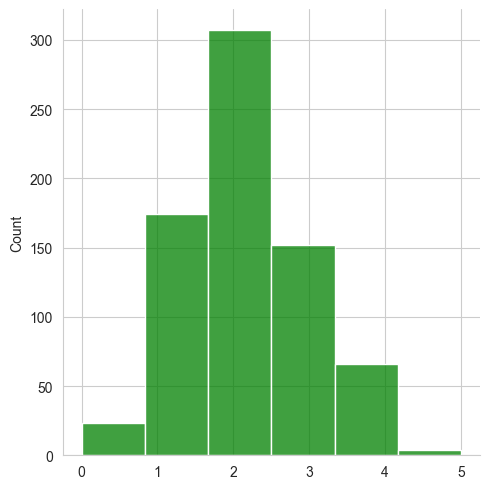

In [40]:
#bar plot
sns.set_style('whitegrid')
sns.displot(data=y_train, kde=False, bins=6,color='green')

####Data Visualization on the basis of Color_id and description

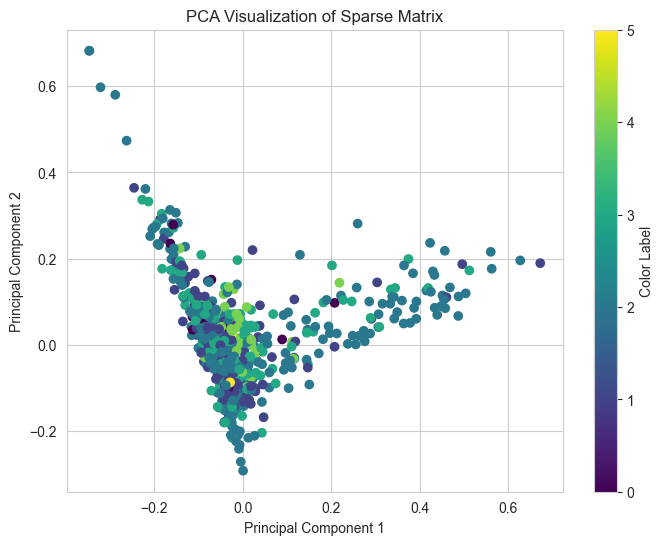

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train.toarray())

# Plot the data as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA Visualization of Sparse Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Color Label')
plt.show()


###Model Training

#### By using the Logistic Regression

In [42]:
model1 = LogisticRegression(max_iter=1000)

In [43]:
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [44]:
x_train_prediction = model1.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [45]:
print('accuracy on training data using logistic regression', training_data_accuracy*100)

accuracy on training data using logistic regression 79.20110192837465


In [46]:
x_test_prediction = model1.predict(x_test)
training_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [47]:
model1.fit(x_test,y_test)

LogisticRegression(max_iter=1000)

In [48]:
print('Accuracy score on the test data', training_data_accuracy*100)

Accuracy score on the test data 43.91025641025641


#### By using the Support vector model

In [49]:
model2 = SVC(kernel='linear')  # Choose an appropriate kernel (linear, rbf, poly, etc.)
model2.fit(x_train, y_train)

SVC(kernel='linear')

In [50]:
y_pred = model2.predict(x_test)

In [51]:
x_train_prediction = model2.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print("Accuracy score on training data",training_data_accuracy*100)

Accuracy score on training data 84.84848484848484


In [52]:
x_test_prediction = model2.predict(x_test)
training_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [53]:
model2.fit(x_test,y_test)

SVC(kernel='linear')

In [54]:
print('Accuracy score on the test data', training_data_accuracy*100)

Accuracy score on the test data 45.19230769230769


#### By using the random forest Classifier


In [55]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
model3.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
x_train_prediction= model3.predict(x_train)

In [57]:
accuracy = accuracy_score(y_train, x_train_prediction)
print("Accuracy score of testing data using random forest classifier:", accuracy*100)

Accuracy score of testing data using random forest classifier: 100.0


In [58]:
x_test_prediction = model3.predict(x_test)
training_data_accuracy = accuracy_score(y_test,x_test_prediction)
model3.fit(x_test,y_test)
print('Accuracy score on the test data', training_data_accuracy*100)

Accuracy score on the test data 48.717948717948715


####After checking the accuracy now save the file use for future model

In [59]:
# Make predictions and store them in a variable
predictions = model3.predict(x_test)

# Optionally, get probabilities for each class (if needed)
probabilities = model3.predict_proba(x_test)

# Print the predictions and probabilities
print("Predictions:", predictions)
print("Probabilities:", probabilities)

Predictions: [1 2 2 2 0 2 2 2 1 2 2 2 2 2 3 2 0 4 1 1 3 2 2 2 2 2 1 4 2 2 1 2 0 1 1 3 2
 1 1 3 4 4 1 4 2 3 4 2 1 2 1 1 3 2 1 2 1 1 2 2 3 2 1 2 3 1 1 2 3 3 4 2 2 4
 3 3 2 2 2 1 2 1 2 4 2 1 1 2 2 3 2 2 2 2 3 2 3 4 2 0 1 1 2 1 3 3 3 1 1 1 3
 2 2 2 2 2 3 2 2 3 4 3 3 1 2 2 2 1 2 2 2 2 3 3 3 2 3 3 2 2 2 0 1 1 2 1 3 1
 2 0 1 2 3 2 2 2 0 3 4 1 1 2 2 1 2 3 1 3 2 1 2 3 3 5 4 1 0 2 4 2 2 2 2 2 2
 2 3 3 3 2 1 1 2 2 2 2 4 2 3 3 0 2 1 2 4 1 3 2 4 1 2 1 2 2 1 2 1 2 2 3 3 1
 2 1 2 4 3 3 3 1 1 2 2 4 2 2 1 2 3 2 1 2 1 4 2 2 1 2 2 0 3 1 1 1 3 2 2 2 2
 1 4 3 3 2 1 1 3 1 3 3 3 2 2 4 3 3 1 3 2 1 3 1 3 2 2 1 1 2 2 3 2 2 2 1 4 2
 3 4 3 4 2 3 4 1 4 4 2 2 5 2 1 4]
Probabilities: [[0.   0.79 0.11 0.05 0.05 0.  ]
 [0.01 0.05 0.87 0.04 0.03 0.  ]
 [0.01 0.18 0.76 0.04 0.01 0.  ]
 ...
 [0.06 0.25 0.64 0.01 0.04 0.  ]
 [0.01 0.85 0.13 0.   0.01 0.  ]
 [0.01 0.16 0.11 0.04 0.67 0.01]]


In [60]:

import pandas as pd
import openpyxl

# ... (your previous code for preprocessing and model loading)

# Make predictions and store them
predictions = model3.predict(X_new)
probabilities = model3.predict_proba(X_new)

# Create a DataFrame to hold the predictions
df = pd.DataFrame({
    'Predicted_Class': predictions
})

# Optionally, add probabilities for each class as columns
for i in range(probabilities.shape[1]):
    df[f'Probability_Class_{i}'] = probabilities[:, i]

# Save the DataFrame to an Excel file
df.to_excel('predictions.xlsx', index=False)

print("Predictions saved to 'predictions.xlsx'")

NameError: name 'X_new' is not defined

In [ ]:
import pickle

In [89]:
filename = 'final_model.pkl'
pickle.dump(model2, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('final_model.xlsx', 'rb'))

In [86]:
%pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('wordnet')
def preprocess_text(text):

    tokens = word_tokenize(text)

    tokens = [token for token in tokens if token not in string.punctuation]


    tokens = [token.lower() for token in tokens]


    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]


    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /Users/supriya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/supriya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import pandas as pd
import openpyxl

result_df = df.copy() # Create a copy of the original DataFrame
result_df['predicted_color'] = '' # Add a new column for predictions

for index, row in df.iterrows():
    if index < len(y_train):
        #X_new = y_train[index]
        predicted_color = model2.predict(x_train[index])
        result_df.at[index, 'predicted_color'] = predicted_color # Set the predicted color for the current row

file_name = 'MarkData.xlsx'
result_df.to_excel(file_name, index=False) # Save the DataFrame to an Excel file

print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
import pandas as pd
import openpyxl

result_df = df.copy() # Create a copy of the original DataFrame
result_df['predicted_color'] = '' # Add a new column for predictions

for index, row in df.iterrows():
    if index < len(y_test):
        #X_new = y_test[index]
        predicted_color = model2.predict(x_test[index])
        result_df.at[index, 'predicted_color'] = predicted_color # Set the predicted color for the current row

file_name = 'MarkData1.xlsx'
result_df.to_excel(file_name, index=False) # Save the DataFrame to an Excel file

print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
X_new = x_train[3]
original_sentence = df.iloc[3]['description']
print(original_sentence)
print(y_train[3])



prediction = model2.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print('not predictable')
elif prediction[0] == 1:
    print('white -> Probably Begin')
elif prediction[0] == 2:
    print('yellow -> Worth a look')
elif prediction[0] == 3:
    print('orange -> Need a serious look into it')
elif prediction[0] == 4:
    print('red -> Requires immediate action')
else:
    print('tricolor -> Saffron')

How do I see other candidates beside Finchem?
1
[2]
yellow -> Worth a look


Store the trained model 

In [64]:
import pickle

# Path to your saved model file
model_path = "color_id_model.pkl"

# Load the model using pickle.load
with open(model_path, 'rb') as f:
  model = pickle.load(f)

print("Model loaded successfully!")


Model loaded successfully!


In [90]:
%pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('wordnet')
def preprocess_text(text):

    tokens = word_tokenize(text)

    tokens = [token for token in tokens if token not in string.punctuation]


    tokens = [token.lower() for token in tokens]


    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]


    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /Users/supriya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/supriya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [108]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


[nltk_data] Downloading package punkt to /Users/supriya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/supriya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/supriya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [109]:
import pickle

# Load the saved model
filename = 'final_model.xlsx'
loaded_model = pickle.load(open(filename, 'rb'))


In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
raw_corpus = [
    "This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",
"This is a great product!",
      "It was not very good.", 
      "I'm so happy with the purchase.",
      "Haley, who was Trump's last rival in the heated GOP primaries before suspending her campaign more than two months ago, and who has not endorsed the former president, was asked during a question-and-answer session following her address Tuesday at a conservative think tank in the nation's capital whether Biden or Trump was stronger on national security issues"
      "Trump has not bee the former two-term South Carolina governor who later served as U.N. ambassador in the Trump administration said.",
      "perfect on these policies. I have made that clear many, many times. But Biden has been a catastrophe. So, I will be voting for Trump"
      "You know we had a nasty campaign. It was pretty nasty. But she’s a very capable person and I’m sure she’s going to be on our team in some form. Absolutely,",
      "Vance, after serving as a Marine in the Iraq War, moved for a handful of years to San Francisco to work as a venture capitalist in the tech industry.",
      "The former president, who has been teasing a potential 2024 presidential bid,",
      "Marco Rubio, who has grown to be a staunch ally of the former president since running against him in the 2016 Republican presidential primaries.",
      "The Party is excited to be sending a delegation to the DNC Convention in full support of President Biden and Vice President Harris",
      "ES&S machines in poll manager training room Why is a person registered to vote at the Nokomis Beach Park Bath House and the mail in ballot is going to France?  208 S Casey Key Road Nokomis FL. Voter id# 127896777 Barbara Claire Weber Baures 2 Ter Avenue, Jean Casale 78530 BUC France Race 9, Female, born 1/15/1963, registered 2/13/2020, Democrat, Voted absentee March 8, 2022, Nov 3, 2020 and March 17, 2020.  No voting history before that.",
"Found a bus broke down with ballot printers. They were  Election Systems Software. At the time reporting said Arizona did not use ESS machines.  During our AZ. audit there was mention of ESS print your ballot at the poll. Now I'm hearing there was voter fraud in Yuma County. The person driving the bus said he obtained the printers, paper for them in yuma. thanks, Shannon Benbow",
"How do I see other candidates beside Finchem",
"early voting again without requesting it. no information on polling locations as to whether they were resuming the original locations or going to the centralized location as we did for gubernatorial.",
"5/2/22 Early Voting Coverage at Bridgeport Police Department, Wise County. While I was voting, a lady came in to question why the propositions weren’t on the ballot she had just cast. She was told that where she lived bordered two cities therefore she wasn’t able to vote on them, and was told besides, “you already cast your vote so nothing can be done now anyway Ballots were pre-initialled by the precinct workers prior to being given out",
" Instead of being initialled upon being given out. This is a red flag for me because it seems like it would make cheating easier."
"I live in a retirement community of over 200 residents. A very high percentage of us did not receive our ballots in the mail. Most of the residents do not drive and so many of them did not vote. Where did the missing ballots go? It seems very, very strange that such a high percentage of us lost our right to vote.",
"Found voter on voter role who is either deceased or alias name by other voter registered in the household. 5434 E Lincoln Dr unit 42 Paradise Valley, Arizona 85253  Mark John Stanton - valid name (alias name listed as M J Stungevicius). NOTE SPELLING of last name ends in “us”.  M J Stungevicins NOTE SPELLING of last name ends in “ns”.   The M J Stungevicins on voter roll is registered at 101 years old.  Found death certificate for “Mary Jane Bermingham Stungevicius (ends in “us”) who is Mark John Stanton’s mother.  She died February 3, 2000.  Information found on voter role: Maricopa County LD 4 Cheney Precinct",



]
preprocessed_corpus = []

for document in raw_corpus:
    # Simple preprocessing for demonstration
    preprocessed_text = document.lower()
    preprocessed_text = re.sub(r'[^\w\s]', '', preprocessed_text)
    preprocessed_corpus.append(preprocessed_text)

print(preprocessed_corpus)
vectorizer = TfidfVectorizer()
vectorizer.fit(preprocessed_corpus)

import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:  # Replace with your desired filename
    pickle.dump(vectorizer, f)

['this is a great product', 'it was not very good', 'im so happy with the purchase', 'haley who was trumps last rival in the heated gop primaries before suspending her campaign more than two months ago and who has not endorsed the former president was asked during a questionandanswer session following her address tuesday at a conservative think tank in the nations capital whether biden or trump was stronger on national security issuestrump has not bee the former twoterm south carolina governor who later served as un ambassador in the trump administration said', 'perfect on these policies i have made that clear many many times but biden has been a catastrophe so i will be voting for trumpyou know we had a nasty campaign it was pretty nasty but shes a very capable person and im sure shes going to be on our team in some form absolutely', 'vance after serving as a marine in the iraq war moved for a handful of years to san francisco to work as a venture capitalist in the tech industry', 'th

In [137]:
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Load your trained model (replace with your actual filename)
model_filename = 'final_model.pkl'
with open(model_filename, 'rb') as f:
    model = pickle.load(f)
    print("Model loaded successfully!")

# Load the TF-IDF vectorizer (replace with your actual filename)
vectorizer_filename = 'tfidf_vectorizer.pkl'
with open(vectorizer_filename, 'rb') as f:
    vectorizer = pickle.load(f)
    print("TF-IDF vectorizer loaded successfully!")

def predict_color(new_text):
    """Predicts the color using the trained model."""

    # Preprocess the new text
    preprocessed_text = preprocess_text(new_text)

    # Transform the preprocessed text using the TF-IDF vectorizer
    features = vectorizer.transform([preprocessed_text])

    # Make prediction using the loaded model
    prediction = model.predict(features)

    # Map the prediction to the corresponding color label
    color_mapping = {0: 'not predictable',
                      1: 'white -> Probably Begin',
                      2: 'yellow -> Worth a look',
                      3: 'orange -> Need a serious look into it',
                      4: 'red -> Requires immediate action',
                      5: 'tricolor -> Saffron'}  # Adjust this based on your actual color mapping

    predicted_color = color_mapping[int(prediction[0])]
    print("Predicted color for the new text:", predicted_color)

# Example usage
new_text = "This document seems urgent based on the red flags identified."
predict_color(new_text)


Model loaded successfully!
TF-IDF vectorizer loaded successfully!


ValueError: X has 362 features, but SVC is expecting 2983 features as input.